In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"https://github.com/LuckyBoy587/Statistical-Methods/raw/refs/heads/main/data/ML374_S8_Practice_HR_Data.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


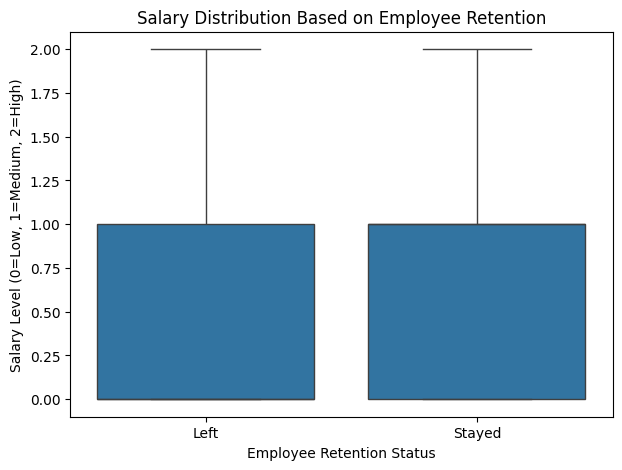

In [16]:
# Convert salary to ordered category → then numeric
salary_order = ['low', 'medium', 'high']
df['salary'] = pd.Categorical(df['salary'], categories=salary_order, ordered=True)
df['salary_num'] = df['salary'].cat.codes  # low=0, medium=1, high=2

# Convert left to readable labels
df['left_label'] = df['left'].map({0: 'Stayed', 1: 'Left'})

plt.figure(figsize=(7,5))
sns.boxplot(data=df, x='left_label', y='salary_num')
plt.title("Salary Distribution Based on Employee Retention")
plt.xlabel("Employee Retention Status")
plt.ylabel("Salary Level (0=Low, 1=Medium, 2=High)")
plt.show()

<Axes: xlabel='Department', ylabel='count'>

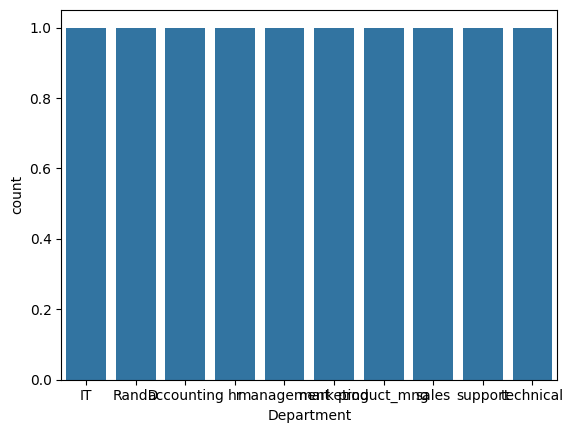

In [15]:
dept_wise_retention = df.groupby("Department")["left"].mean() * 100
dept_wise_retention = dept_wise_retention.reset_index()
sns.countplot(data=dept_wise_retention, x="Department")

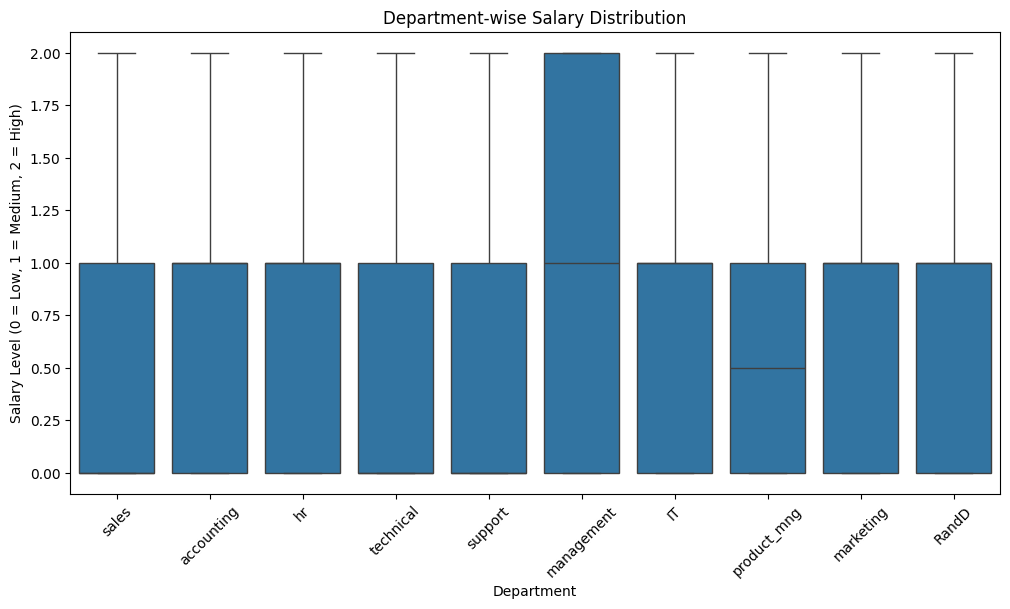

In [22]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Department', y='salary_num')
plt.title("Department-wise Salary Distribution")
plt.xlabel("Department")
plt.ylabel("Salary Level (0 = Low, 1 = Medium, 2 = High)")
plt.xticks(rotation=45)
plt.show()

Department
IT             22.249389
RandD          15.374841
accounting     26.597132
hr             29.093369
management     14.444444
marketing      23.659674
product_mng    21.951220
sales          24.492754
support        24.899058
technical      25.625000
Name: left, dtype: float64


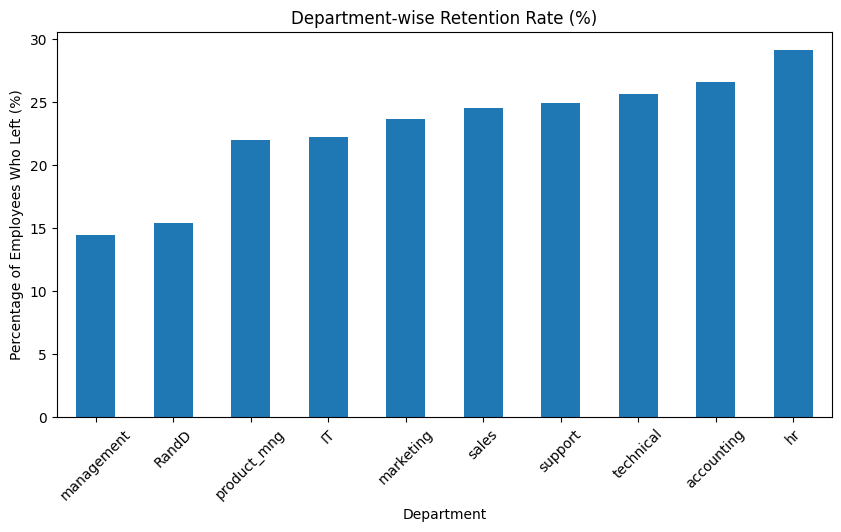

In [20]:
dept_retention = df.groupby('Department')['left'].mean() * 100
print(dept_retention)
plt.figure(figsize=(10,5))
dept_retention.sort_values().plot(kind='bar')

plt.title("Department-wise Retention Rate (%)")
plt.xlabel("Department")
plt.ylabel("Percentage of Employees Who Left (%)")
plt.xticks(rotation=45)
plt.show()